# Capítulo 3

#### Esfera de Bloch

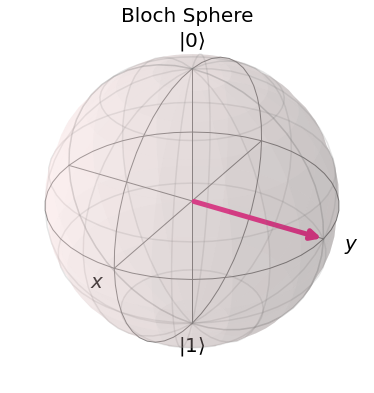

In [3]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([0,1,0], title="Bloch Sphere")

## 3.1 Puertas cuánticas

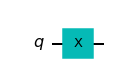

In [4]:
#Pauli-X
from qiskit import QuantumCircuit
from qiskit.tools.visualization import circuit_drawer

qc = QuantumCircuit(1)
qc.x(0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

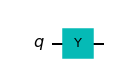

In [5]:
#Pauli-Y
qc = QuantumCircuit(1)
qc.y(0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

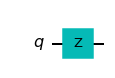

In [6]:
#Pauli-Z
qc = QuantumCircuit(1)
qc.z(0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

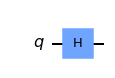

In [7]:
#Hadamard
qc = QuantumCircuit(1)
qc.h(0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

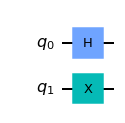

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

## 3.2 Puertas de varios qubits

#### CNOT

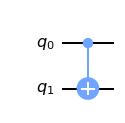

In [9]:
qc = QuantumCircuit(2)
qc.cnot(0,1)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

In [10]:
#Vamos a simular la puerta CNOT para encontrar la matriz asociada


from qiskit import QuantumCircuit, Aer, assemble

import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [11]:
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

#### Circuito de Bell


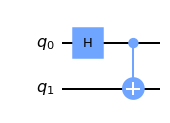

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0,1)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

#### CNOT circuit identity


In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
#print(qc.draw(output='latex_source'))
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")


┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

#### Toffoli gate

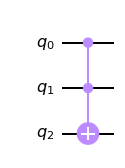

In [14]:
qc=QuantumCircuit(3)
qc.ccx(0,1,2)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

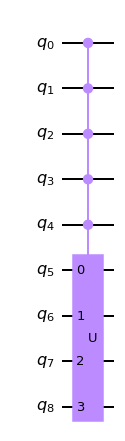

In [93]:
qc1 = QuantumCircuit(4)
#Configuramos la puerta U
qc1.x(0)
qc1.h(1)
qc1.ccx(0,2,3)
qc1.cx(1,3)
gate = qc1.to_gate()
gate.name = 'U'
custom = gate.control(5)

qc2 = QuantumCircuit(9)
qc2.append(custom, [0,1,2,3,4,5,6,7,8])
#print(qc2.draw(output='latex_source'))
qc2.draw(output='mpl')

### Medición

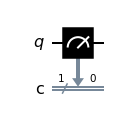

In [15]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)
#print(qc.draw(output='latex_source'))
qc.draw('mpl')

## Circuitos cuánticos

#### NAND con Toffoli

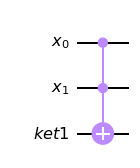

In [16]:
from qiskit import QuantumRegister

A = QuantumRegister(1,name='x_0')
B = QuantumRegister(1,name='x_1')
In = QuantumRegister(1,name='ket{1}')
qc = QuantumCircuit(A,B,In)
qc.ccx(A,B,In)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

### Intercambiar qubits

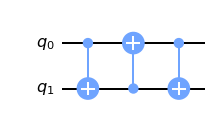

In [17]:
qc=QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

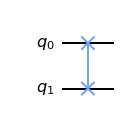

In [18]:
q = QuantumCircuit(2)
q.swap(0,1)
q.draw(output='mpl')

### Bell states

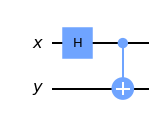

In [19]:
#Circuito de Bell
x = QuantumRegister(1,name='x')
y = QuantumRegister(1,name='y')
qc = QuantumCircuit(x,y)
qc.h(0)
qc.cx(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

### Teleportación cuántica

In [20]:
from qiskit import ClassicalRegister

psi = QuantumRegister(1,name='ket{\psi}')
beta = QuantumRegister(1,name='ket{\beta_{xy}^B')
medidor = ClassicalRegister(2,'medicion')
qc = QuantumCircuit(psi,beta,medidor)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
#print(qc.draw(output='latex_source'))
qc.draw()

┌───┐     ┌─┐   
      ket{\psi}: ┤ H ├──■──┤M├───
                 └───┘┌─┴─┐└╥┘┌─┐
ket{eta_{xy}^B: ─────┤ X ├─╫─┤M├
                      └───┘ ║ └╥┘
     medicion: 2/═══════════╩══╩═
                            0  1

In [21]:
m1 = QuantumRegister(1,name='m1')
m2 = QuantumRegister(1,name='m2')
beta = QuantumRegister(1,name='ket{\beta_{xy}^B}')
qc = QuantumCircuit(m1,m2,beta)
qc.cx(0,2)
qc.cz(1,2)

#print(qc.draw(output='latex_source'))
qc.draw()

m1: ──■─────
                    │     
              m2: ──┼───■─
                  ┌─┴─┐ │ 
ket{eta_{xy}^B}: ┤ X ├─■─
                  └───┘

# Capitulo 4

## Algoritmo de Deutsch

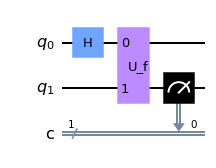

In [94]:
#Paso 1
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

U_f = Gate(name='U_f', num_qubits=2, params=[])

qc = QuantumCircuit(2,1)
qc.h(0)
qc.append(U_f,[0,1])
qc.measure(1,0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

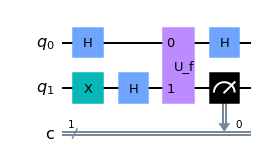

In [95]:
# Algoritmo para U_f
qc = QuantumCircuit(2,1)
qc.h(0)
qc.x(1)
qc.h(1)
qc.append(U_f,[0,1])
qc.h(0)
qc.measure(1,0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

### Algoritmo

In [96]:
#Algoritmo de Deutsch
def Deutsch_Algorithm(oracle):
    """

    Parameters
    ----------
    f : Circuito cuántico U_f, dos qubits de entrada y dos qubits de salida

    Returns
    -------
    qc circuito cuántico correspondiente al algoritmo de Deutsch

    """
    qc = QuantumCircuit(2,1)
    qc.h(0)
    qc.x(1)
    qc.h(1)
    qc.append(oracle,[0,1])
    qc.h(0)
    qc.measure(0,0)
    return qc

In [97]:
import numpy as np
from qiskit.providers.aer import QasmSimulator
from qiskit import transpile
simulator = QasmSimulator()

n = 1

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

qc = Deutsch_Algorithm(const_oracle) 

compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
qc.draw()    


Total count for 00 and 11 are: {'0': 1000}


┌───┐     ┌──────────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├
     ├───┤┌───┐│  circuit-408 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤1             ├──────╫─
     └───┘└───┘└──────────────┘      ║ 
c: 1/════════════════════════════════╩═
                                     0



## Algoritmo QFT para 4 qubits

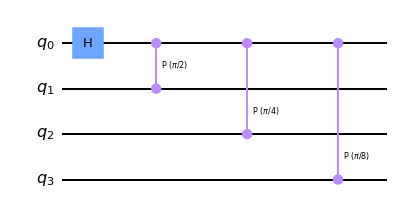

In [98]:
import numpy as np


#Paso 1 y 2
qc = QuantumCircuit(4)
qc.h(0)
qc.cp(np.pi/2,1,0)
qc.cp(np.pi/4,2,0)
qc.cp(np.pi/8,3,0)
qc.draw(output='mpl')


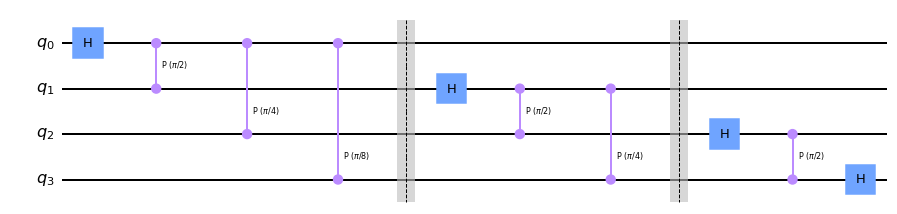

In [99]:
# Paso 3
qc.barrier()
qc.h(1)
qc.cp(np.pi/2,2,1)
qc.cp(np.pi/4,3,1)
qc.barrier()
qc.h(2)
qc.cp(np.pi/2,3,2)
qc.h(3)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

### Algoritmo en general QFT
Teniendo en cuenta que en qiskit el qubit menos significativo es el cero por lo que hay que darle la vuelta

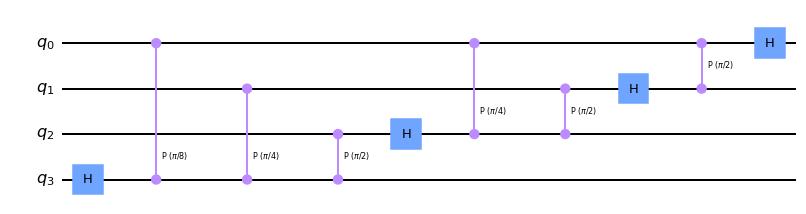

In [100]:
def qft(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)
    return circuit


qc = QuantumCircuit(4)
qc = qft(qc,4)
qc.draw(output='mpl')

## Algoritmo suma modular

#### Suma modular para números de 3 bits

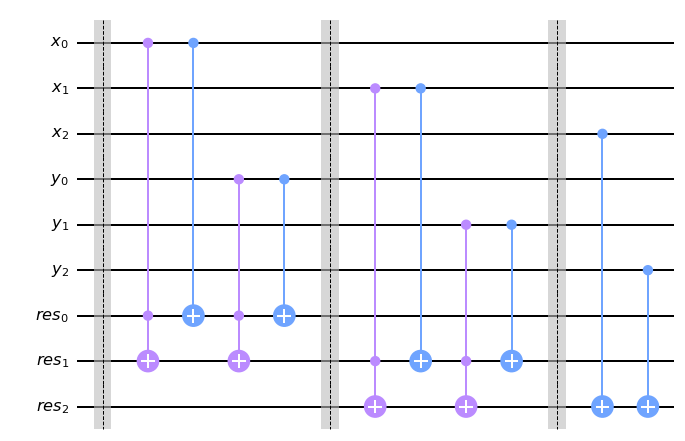

In [101]:
from qiskit import QuantumRegister

x_0 = QuantumRegister(1, name='x_0')
x_1 = QuantumRegister(1, name='x_1')
x_2 = QuantumRegister(1, name='x_2')
y_0 = QuantumRegister(1, name='y_0')
y_1 = QuantumRegister(1, name='y_1')
y_2 = QuantumRegister(1, name='y_2')
res_0 = QuantumRegister(1, name='res_0')
res_1 = QuantumRegister(1, name='res_1')
res_2 = QuantumRegister(1, name='res_2')

qc = QuantumCircuit(x_0,x_1,x_2,y_0,y_1,y_2,res_0,res_1,res_2)
qc.barrier()
qc.ccx(0,6,7)
qc.cx(0,6)
qc.ccx(3,6,7)
qc.cx(3,6)
qc.barrier()
qc.ccx(1,7,8)
qc.cx(1,7)
qc.ccx(4,7,8)
qc.cx(4,7)
qc.barrier()
qc.cx(2,8)
qc.cx(5,8)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

## Algoritmo Deutsch-Jozsa

In [431]:
# Para la generación del orácula, se utilizará el algoritmo creado por IBM:
# https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html
def oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [430]:

def deutsch_jozsa(oracle, n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(n)
    for i in range(n):
        qc.h(i)
    qc.append(oracle, range(n+1))
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.measure(i, i)
    return qc

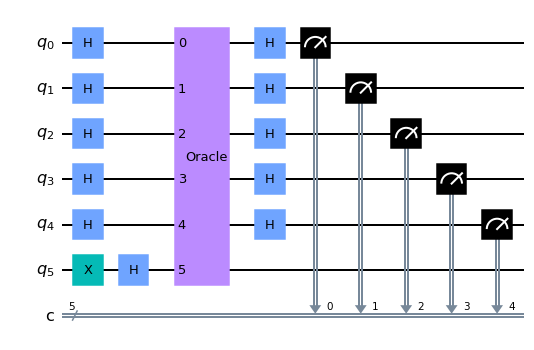

In [433]:
#Ejemplo de uso para balanceado
f = oracle('balanced', 5)
dj_circuit = deutsch_jozsa(f, 5)
dj_circuit.draw(output='mpl')

### Algoritmo suma modular n bits

In [103]:
def circuito_suma(n):
    qc = QuantumCircuit(3*n,n)
    for i in range(n-1):
        qc.barrier()
        qc.ccx(i,i+2*n,i+2*n+1)
        qc.cx(i,i+2*n)
        qc.ccx(i+n,i+2*n,i+2*n+1)
        qc.cx(i+n,i+2*n)
    qc.barrier()
    qc.cx(n-1,3*n-1)
    qc.cx(2*n-1,3*n-1)
    for i in range(n):
        qc.measure(2*n+i,i)
    return qc

In [209]:
def suma_bits(n,st1,st2):
    qc = QuantumCircuit(3*n,n)
    i = n-1
    for c in st1:
        if c=='1':
            qc.x(i)
        i-=1
    i=2*n-1
    for c in st2:
        if c=='1':
            qc.x(i)
        i-=1
#    result = qc.compose(circuito_suma(n))
    return qc

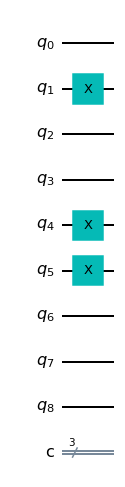

In [213]:
qc = suma_bits(3,'010','110')
qc.draw(output='mpl')

In [439]:
#Si queremos un programa que nos diga directamente el resultado:

def suma_modular(a,b):
    aux = max(a,b)
    m = min(a,b)
    a=aux
    b=m
    a = "{0:b}".format(a)
    b = "{0:b}".format(b)
    if (len(a)>len(b)):
        r = len(a)-len(b)
        st = '0'*r
        b=st+b
    qc = suma_bits(len(a),a,b).compose(circuito_suma(len(a)))
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print('El resultado de la suma en binario de ',a,'+',b, 'es: ',counts)
    return qc

El resultado de la suma en binario de  11 + 11 es:  {'10': 1024}
El resultado de la suma en binario de  100 + 011 es:  {'111': 1024}
El resultado de la suma en binario de  101 + 001 es:  {'110': 1024}


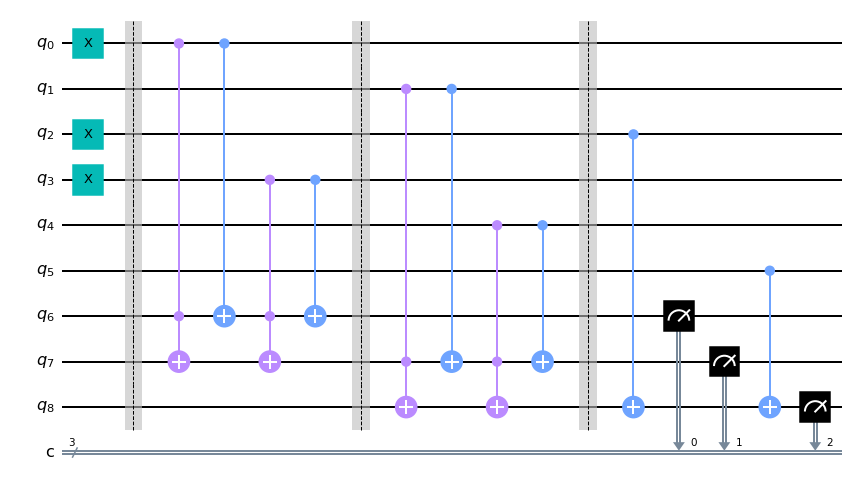

In [440]:
suma_modular(3,3)
suma_modular(3,4)
suma_modular(1,5).draw(output='mpl')

# Operadores de mutación

## Mutantes a mano

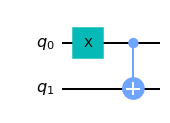

In [108]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')


In [109]:
from qiskit import QuantumCircuit, Aer, assemble

import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

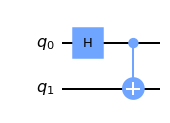

In [110]:
# Aplicar operador de mutación que cambie la puerta x por la puerta h
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

In [111]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

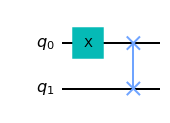

In [112]:
# Aplicar operador de mutación que cambie la puerta cnot por la puerta swap
qc = QuantumCircuit(2)
qc.x(0)
qc.swap(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

In [113]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

# Operadores de mutación en qiskit

### Importamos las puertas que usa qiskit

In [114]:
from qiskit.circuit.library import HGate, SwapGate
from qiskit.circuit.library.standard_gates import (
    IGate,
    U1Gate,
    U2Gate,
    U3Gate,
    XGate,
    YGate,
    ZGate,
    HGate,
    SGate,
    SdgGate,
    TGate,
    TdgGate,
    RXGate,
    RYGate,
    RZGate,
    CXGate,
    CYGate,
    CZGate,
    CHGate,
    CRZGate,
    CU1Gate,
    CU3Gate,
    SwapGate,
    RZZGate,
    CCXGate,
    CSwapGate,
)
#Primer tipo de operador, cambiar puertas consecutivas de orden, cambiando tambien el circuito

one_q_ops = [
        IGate,
        U1Gate,
        U2Gate,
        U3Gate,
        XGate,
        YGate,
        ZGate,
        HGate,
        SGate,
        SdgGate,
        TGate,
        TdgGate,    
        RXGate,
        RYGate,
        RZGate,
    ]
one_param = [U1Gate, RXGate, RYGate, RZGate, RZZGate, CU1Gate, CRZGate]
two_param = [U2Gate]
three_param = [U3Gate, CU3Gate]
two_q_ops = [CXGate, CYGate, CZGate, CHGate, CRZGate, CU1Gate, CU3Gate, SwapGate, RZZGate]
three_q_ops = [CCXGate, CSwapGate]

### Funciones auxiliares

In [217]:
from qiskit.circuit import Instruction, Qubit, Clbit
import random
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram 





def change(ls,q1,q2):
    if q1 in ls:
        index = ls.index(q1)
        ls[index]=q2
    return ls
        

def replace(circ, origin: Instruction, instruction: Instruction,pos=0):
    """
    Parameters
    ----------
    circ : QuantumCircuit
        circuito a modificar
    origin : Instruction
        puerta a eliminar
    instruction : Instruction
        puerta a insertar
    pos : Int
        Posición de la puerta a cambiar, si hay 3 puertas iguales, al poner pos=1 solo se cambia la segunda

    Description
    -----------
    Intercambia TODAS las puertas origin por la puerta instruction en el circuito circ
    
    Returns
    -------
    found : Bool

    """
    found = False
    i=0
    while i<len(circ._data) and (not found):
        if circ._data[i][0]==origin:
            if pos==0:
                found=True
                circ._data[i]=(instruction,circ._data[i][1],circ._data[i][2])
            else:
                pos-=1
        i+=1
    return found


def replace_target_qubit(circ,origin,target_qubit: Qubit,final_qubit: Qubit, pos=0):
    """
    Parameters
    ----------
    circ : QuantumCircuit
    origin : Instruction
    target_qubit : Qubit
    final_qubit : Qubit
    pos : Int
        Posición de la puerta a cambiar, si hay 3 puertas iguales, al poner pos=1 solo se cambia la segunda

    Description
    -----------
    Dada una puerta origin, intercambia target_qubit por final_qubit en el conjunto de los qubits a los que afecta la puerta
    
    Returns
    -------
    found : Bool

    """
    found = False
    i=0
    while i<len(circ._data) and (not found):
        if circ._data[i][0]==origin:
            if pos==0 and target_qubit in circ._data[i][1]:
                found=True
                circ._data[i]=(circ._data[i][0],change(circ._data[i][1],target_qubit,final_qubit),circ._data[i][2])
            else:
                pos-=1
        i+=1
    return found

def replace_target_clbit(circ,origin: Instruction,target_clbit: Clbit,final_clbit: Clbit, pos=0):
    """

    Parameters
    ----------
    circ : QuantumCircuit
    origin : Instruction
    target_clbit : Clbit
    final_clbit : Clbit
    pos : Int
        Posición de la puerta a cambiar, si hay 3 puertas iguales, al poner pos=1 solo se cambia la segunda

    Description
    -----------
    Dada una puerta que tenga bits clásicos, intercambia target_clbit por final_clbit en el conjunto de bits clásicos a los que afecta la puerta    

    Returns
    -------
    found : Bool

    """
    found = False
    i=0
    while i<len(circ._data) and (not found):
        if circ._data[i][0]==origin:
            if pos==0:
                if target_clbit in circ._data[i][2]:
                    found=True
                    circ._data[i]=(circ._data[i][0],circ._data[i][1],change(circ._data[i][2],target_clbit,final_clbit))
            else:
                pos-=1
        i+=1
    return found

def replace_all(circ, origin: Instruction, instruction: Instruction):
    """
    Parameters
    ----------
    circ : QuantumCircuit
        circuito a modificar
    origin : Instruction
        puerta a eliminar
    instruction : Instruction
        puerta a insertar

    Description
    -----------
    Intercambia TODAS las puertas origin por la puerta instruction en el circuito circ
    
    Returns
    -------
    None.

    """
    circ._data = [(instruction, _inst[1], _inst[2]) if _inst[0] == origin  else _inst for _inst in circ._data]
    
    
    
def replace_all_target_qubit(circ,origin,target_qubit: Qubit,final_qubit: Qubit):
    """
    Parameters
    ----------
    circ : QuantumCircuit
    origin : Instruction
    target_qubit : Qubit
    final_qubit : Qubit

    Description
    -----------
    Dada una puerta origin, intercambia target_qubit por final_qubit en el conjunto de los qubits a los que afecta la puerta
    
    Returns
    -------
    None.

    """
    circ._data = [(_inst[0], change(_inst[1],target_qubit,final_qubit), _inst[2]) if _inst[0] == origin  else _inst for _inst in circ._data]





def replace_all_target_clbit(circ,origin: Instruction,target_clbit: Clbit,final_clbit: Clbit):
    """
    
    Parameters
    ----------
    circ : QuantumCircuit
    origin : Instruction
    target_clbit : Clbit
    final_clbit : Clbit

    Description
    -----------
    Dada una puerta que tenga bits clásicos, intercambia target_clbit por final_clbit en el conjunto de bits clásicos a los que afecta la puerta    

    Returns
    -------
    None.

    """
    circ._data = [(_inst[0], _inst[1], change(_inst[2],target_clbit,final_clbit)) if _inst[0] == origin  else _inst for _inst in circ._data]



### Operador 1: gate_mutant

In [422]:
def gate_mutant(circ1,input_gate=None,output_gate=None,verbose=False):
    """
    

    Parameters
    ----------
    circ1 : QuantumCircuit
    input_gate : Instruction
    output_gate : Instruction
        
    Description
    -----------
    Intercambia input_gate por output_gate en circ1, si no se especifica alguna de las dos, se toma de manera aleatoria.

    Returns
    -------
    circ : QuantumCircuit
        Mutant

    """
    circ = circ1.copy()
    if input_gate is None:
        n = len(circ.data)
        i=0
        num_clbits=-1
        valid = False
        while num_clbits!=0 and i<n and not valid:
            r = random.randint(0, n-1)
            inst = circ.data[r]
            if inst[0].num_qubits<3:
                input_gate=inst[0]
                num_clbits = input_gate.num_clbits
            i+=1
    if output_gate is None:
        """
        Si no le decimos lo contrario, cambia puertas que afectan a la misma cantidad de bits
        """
        num_qubits=input_gate.num_qubits
        if num_qubits==1:
            GATE = one_q_ops[random.randint(0, len(one_q_ops)-1)]
        elif num_qubits==2:
            GATE = two_q_ops[random.randint(0, len(two_q_ops)-1)]
        elif num_qubits==3:
            GATE = three_q_ops[random.randint(0, len(three_q_ops)-1)]
        if GATE in one_param:
            p = random.uniform(0, 2*np.pi)
            output_gate = GATE(p)
        elif GATE in two_param:
            p1 = random.uniform(0, 2*np.pi)
            p2 = random.uniform(0, 2*np.pi)
            output_gate = GATE(p1,p2)
        elif GATE in three_param:
            p1=random.uniform(0, 2*np.pi)
            p2=random.uniform(0, 2*np.pi)
            p3=random.uniform(0, 2*np.pi)
            output_gate = GATE(p1,p2,p3)
        else:
            output_gate = GATE()     
    replace(circ,input_gate,output_gate)
    if verbose:
        print('Se reemplaza la puerta ',input_gate.name,' por la puerta ',output_gate.name)
    return circ

### Operador 2: targetqubit_mutant


In [423]:
def targetqubit_mutant(circ1,gate=None,target_qubit=None,final_qubit=None,verbose=False):
    """
    

    Parameters
    ----------
    circ1 : QuantumCircuit
    gate : Instruction
    target_qubit : Qubit
    final_qubit : Quibit

    Description
    -----------
    Intercambia, en gate, target_qubit por final_qubit. Los parámetros no especificados se seleccionan de manera aleatoria

    Returns
    -------
    circ : QuantumCircuit
        Mutant

    """
    circ = circ1.copy()
    if gate is None:
        n = len(circ.qubits)
        if n<3:
            raise Exception('Impossible to change target qubits for any gate as there are less than 3 qubits')
        else:
            i=0
            num_qubits=0
            while num_qubits<2 and i<n:  
                r = random.randint(0, n-1)
                inst = circ.data[r]
                num_qubits = inst[0].num_qubits
                i+=1
                gate=inst[0]
    if gate.name == 'barrier':
        return circ
    if gate.num_qubits<2:
        raise Exception('Could not find multi qubit gates, change the circuit or try again')
    else:
        if target_qubit is None:
            target_qubit = inst[1][random.randint(0, len(inst[1])-1)]
        if final_qubit is None:
            final_qubit = circ.qubits[random.randint(0,len(circ.qubits)-1)]
        replace_target_qubit(circ, gate, target_qubit, final_qubit)
    if verbose:
        print('Se han cambiado los qubits a los que afecta la puerta ',gate.name)
    return circ
        

### Operador 3: targetclbit_mutant

In [424]:
def targetclbit_mutant(circ1,gate=None,target_clbit=None,final_clbit=None,verbose=False):
    """
    

    Parameters
    ----------
    circ1 : QuantumCircuit
    gate : Instruction
    target_clbit : Clbit
    final_clbit : Clbit


    Description
    -----------
    Intercambia, en gate, target_clbit por final_clbit. Los parámetros no especificados se seleccionan de manera aleatoria


    Returns
    -------
    circ : QuantumCircuit
        Mutant

    """
    circ = circ1.copy()
    if gate is None:
        n = len(circ.data)
        if len(circ.clbits)<2:
            raise Exception('Impossible to change target clbits as there are less than 2')
        else:
            i=0
            num_clbits=0
            while num_clbits==0 and i<n:  
                r = random.randint(0, n-1)
                inst = circ.data[r]
                num_clbits = inst[0].num_clbits
                i+=1
                gate=inst[0]
    if gate.num_clbits==0:
        return circ
    if gate.name == 'barrier':
        return circ
    else:
        if target_clbit is None:
            target_clbit = inst[2][random.randint(0, len(inst[2])-1)]
        if final_clbit is None:
            final_clbit = circ.clbits[random.randint(0,len(circ.clbits)-1)]
        replace_target_clbit(circ, gate, target_clbit, final_clbit)
    if verbose:
        print('Se ha cambiado los bits clásicos afectados')
    return circ

### Operador 4: measure_mutant

In [425]:
def measure_mutant(circ1,target_qubit=None,final_qubit=None,verbose=False):
    """
    

    Parameters
    ----------
    circ1 : TQuantumCircuit 
    target_qubit : Qubit
    final_qubit : Qubit

    Description
    -----------
    Intercambia, en una medición, target_qubit por final_qubit. Los parámetros no especificados se seleccionan de manera aleatoria

    
    Returns
    -------
    circ : QuantumCircuit
        Mutant
    """
    circ=circ1.copy()
    n=len(circ.data)
    if len(circ.clbits)<2:
        raise Exception('Impossible to change target clbits as there are less than 2')
    if target_qubit is None:
        i=0
        found=False
        while i<n and not found:
            r = random.randint(0, n-1)
            inst = circ.data[r]
            if inst[0].name=='measure':
                found=True
            i+=1
            gate=inst[0]
        target_qubit=inst[1][0]
    else:
        found=False
        i=0
        while not found and i<n:
            inst = circ.data[i]
            if inst[0]=='measure' and target_qubit in inst[1]:
                found=True
            gate=inst[0]
            i+=1
    if gate.name == 'barrier':
        return circ
    if gate.name != 'measure':
        return circ
    if final_qubit is None:
        final_qubit = circ.qubits[random.randint(0,len(circ.qubits)-1)]
    if verbose:
        print('Se cambia el qubit al que afecta la medición')
    replace_target_qubit(circ, gate, target_qubit, final_qubit)
    return circ

### Operador de operadores


In [426]:
def mutant(circ,gate=True,target_qubit=True,target_clbit=True,measure=True,verbose=False):
    """
    

    Parameters
    ----------
    circ : QuantumCircuit
    gate : bool
    target_qubit : bool
    target_clbit : bool
    measure : bool
        Indica si se quiere dar la opción de usar al operador measure

    
    Description
    -----------
    Garantiza que devuelve un mutante del circuito original de manera aleatoria seleccionando unos de los cuatro operadores, si se indica que alguno de los tres es falso, no se generará el mutante usando ese operador


    Returns
    -------
    result : QuantumCircuit
        Mutant

    

    """
    
    r = random.randint(1, 4)
    if r==1 and gate:
        result = gate_mutant(circ,verbose=False)
    elif r==2 and target_qubit:
        result = targetqubit_mutant(circ,verbose=False)
    elif r==3 and target_clbit:
        result = targetclbit_mutant(circ,verbose=False)
    elif measure:
        result = measure_mutant(circ,verbose=False)
    else:
        result = mutant(circ,gate,target_qubit,target_clbit,measure,verbose)
    if result == circ:
        result = mutant(circ,gate,target_qubit,target_clbit,measure,verbose)
    return result

In [427]:
# Ahora hacemos que sean métodos para QuantumCircuit
QuantumCircuit.mutant = mutant
QuantumCircuit.gate_mutant = gate_mutant
QuantumCircuit.targetqubit_mutant = targetqubit_mutant
QuantumCircuit.targetclbit_mutant = targetclbit_mutant
QuantumCircuit.measure_mutant = measure_mutant

# Ejemplos de uso

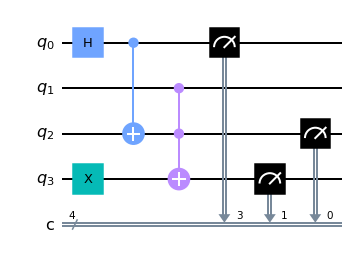

In [141]:
#Creamos un circuito para mutarlo
qc = QuantumCircuit(4,4)
qc.h(0)
qc.x(3)
qc.cx(0,2)
qc.ccx(1,2,3)
qc.measure([0,3,2],[3,1,0])
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

Se reemplaza la puerta  cx  por la puerta  rzz
Se reemplaza la puerta  h  por la puerta  x


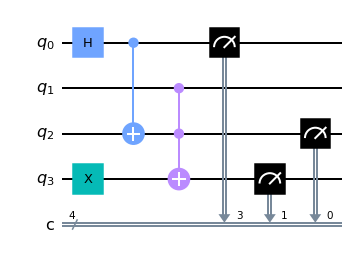

In [142]:
# Operador 1
qc.gate_mutant()#Esto nos devolverá el cambio de cualquier puerta por cualquier otra

#Cambiamos particularmente la puerta H por la puerta X
qc.gate_mutant(HGate(),XGate())
qc.draw(output='mpl')

In [143]:
# Por ejemplo, podemos crear una lista de mutantes dada una lista de puertas
puertas = [XGate(),SdgGate(),ZGate(),YGate()]
mutantes = [qc.gate_mutant(HGate(),puerta) for puerta in puertas]
mutantes

Se reemplaza la puerta  h  por la puerta  x
Se reemplaza la puerta  h  por la puerta  sdg
Se reemplaza la puerta  h  por la puerta  z
Se reemplaza la puerta  h  por la puerta  y


Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]) 0
Se han cambiado los qubits a los que afecta la puerta  cx


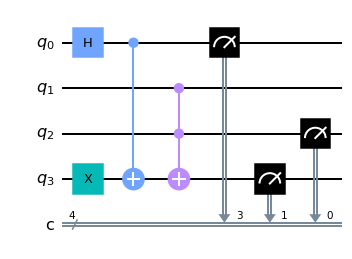

In [144]:
qc.targetqubit_mutant().draw(output='mpl')

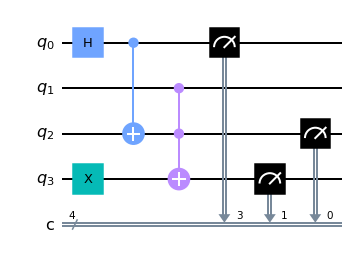

In [145]:
qc.draw(output='mpl')
#El anterior mutante ha cambiado el qubit de control en la puerta cx

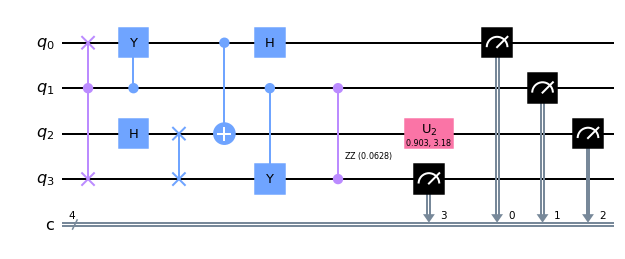

In [146]:
from qiskit.circuit.random import random_circuit

circ = random_circuit(4, 4, measure=True)
circ.draw(output='mpl')

Se reemplaza la puerta  u2  por la puerta  x


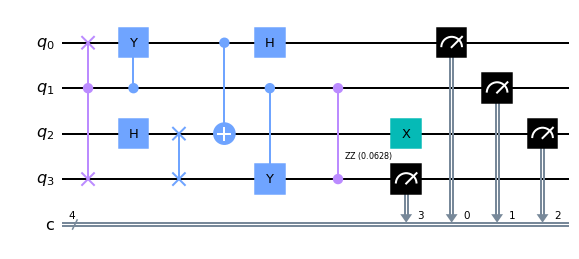

In [147]:
c1 = circ.mutant()
#print(c1.draw(output='latex_source'))
c1.draw(output='mpl')

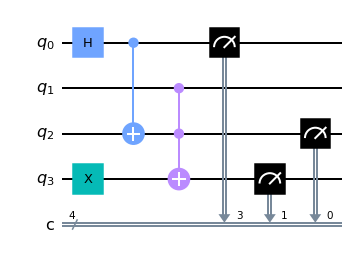

In [148]:
#Creamos un circuito para mutarlo
qc = QuantumCircuit(4,4)
qc.h(0)
qc.x(3)
qc.cx(0,2)
qc.ccx(1,2,3)
qc.measure([0,3,2],[3,1,0])
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

In [149]:
#Ahora creamos tres mutantes del circuito
m1 = qc.gate_mutant(HGate(),SdgGate())
m2 = qc.targetqubit_mutant(CXGate(),qc.qubits[0],qc.qubits[1])
m3 = qc.measure_mutant(qc.qubits[0],qc.qubits[1])

Se reemplaza la puerta  h  por la puerta  sdg
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]) 0
Se han cambiado los qubits a los que afecta la puerta  cx
Se cambia el qubit al que afecta la medición
Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]) 0


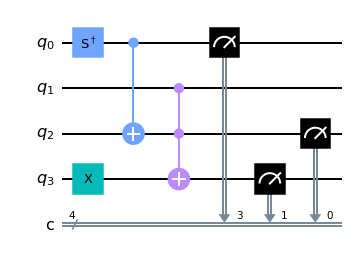

In [150]:
#print(m1.draw(output='latex_source'))
m1.draw(output='mpl')

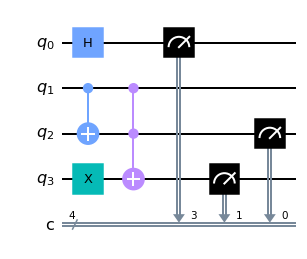

In [151]:
#print(m2.draw(output='latex_source'))
m2.draw(output='mpl')

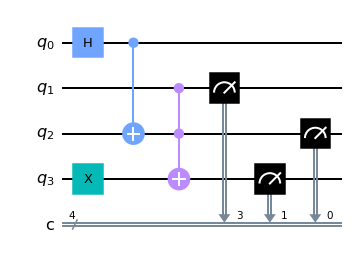

In [152]:
#print(m3.draw(output='latex_source'))
m3.draw(output='mpl')

# Ejemplo de generación de mutantes

In [428]:
#Usamos la función circuito_suma para crear el circuito de la suma y generar los mutantes
n=5
qc = circuito_suma(n)
#Ahora creamos la lista de mutantes de circuito suma de manera aleatoria usando el módulo creado
m = 20
mutantes = [qc.mutant() for i in range(m)]
print('Mutantes generados')
# Ahora generamos un conjunto test


qc0 = suma_bits(5,'10101','11100')
circuito_original = qc0.compose(qc)

def compilar(qc,verbose=False):
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    if verbose:
        print(qc.draw())
        print('Resultado ',counts)
    return counts

Mutantes generados


In [429]:
#Ya tenemos todos los ingredientes para realizar algo parecido al testing
resultado_original = compilar(circuito_original)

suma_mutantes = [qc0.compose(circuit) for circuit in mutantes]
print('Circuito de suma realizado para todos los mutantes')

resultado_mutantes = [compilar(circuit) for circuit in suma_mutantes]
print('Mutantes calculados')

comparacion_mutantes = [resultado_original==resultado for resultado in resultado_mutantes]
print(comparacion_mutantes)

mutantes_vivos = [mutantes[i] for i in range(len(mutantes)) if comparacion_mutantes[i]]

mutantes_matados = len(mutantes)-len(mutantes_vivos)
print('Mutantes matados: ',mutantes_matados,'/',m)

Circuito de suma realizado para todos los mutantes
Mutantes calculados
[False, False, False, True, True, False, True, False, False, False, False, False, True, False, True, False, False, True, False, False]
Mutantes matados:  14 / 20


# Ejemplo de metamorphic testing

In [46]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()
    


def circuito_suma(n):
    qc = QuantumCircuit(3*n,n)
    for i in range(n-1):
        qc.barrier()
        qc.ccx(i,i+2*n,i+2*n+1)
        qc.cx(i,i+2*n)
        qc.ccx(i+n,i+2*n,i+2*n+1)
        qc.cx(i+n,i+2*n)
    qc.barrier()
    qc.cx(n-1,3*n-1)
    qc.cx(2*n-1,3*n-1)
    for i in range(n):
        qc.measure(2*n+i,i)
    return qc
def suma_bits(n,st1,st2):
    qc = QuantumCircuit(3*n,n)
    i = n-1
    for c in st1:
        if c=='1':
            qc.x(i)
        i-=1
    i=2*n-1
    for c in st2:
        if c=='1':
            qc.x(i)
        i-=1
    result = qc.compose(circuito_suma(n))
    return result
def suma_modular(a,b):
    aux = max(a,b)
    m = min(a,b)
    a=aux
    b=m
    a = "{0:b}".format(a)
    b = "{0:b}".format(b)
    if (len(a)>len(b)):
        r = len(a)-len(b)
        st = '0'*r
        b=st+b
    qc = suma_bits(len(a),a,b)
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print(qc.draw())
    print('El resultado de la suma en binario de ',a,'+',b, 'es: ',counts)
    return qc

In [47]:
#Ejemplo de la regla metamórfica
qc=suma_bits(5,'10101','10100')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit,shots=10)
result = job.result()
counts1 = result.get_counts(compiled_circuit)
print(counts1)

qc=suma_bits(5,'10100','10101')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit,shots=10)
result = job.result()
counts2 = result.get_counts(compiled_circuit)
print(counts2)
counts1 == counts2

{'01001': 10}
{'01001': 10}


True

In [48]:
import random
# Usaremos esta función para crear un conjunto test 
def rand_key(p):
   
    # Variable to store the
    # string
    key1 = ""
 
    # Loop to find the string
    # of desired length
    for i in range(p):
         
        # randint function to generate
        # 0, 1 randomly and converting
        # the result into str
        temp = str(random.randint(0, 1))
 
        # Concatenation the random 0, 1
        # to the final result
        key1 += temp
         
    return(key1)

n = 5
test = [rand_key(n) for i in range(100)]

In [49]:
import functools
import operator


l=[None]*(len(test)-1)
for i in range(len(test)-1):

    qc1 = suma_bits(n,test[i],test[i+1])
    qc2 = suma_bits(n,test[i+1],test[i])
    
    compiled_circuit = transpile(qc1, simulator)
    job = simulator.run(compiled_circuit,shots=10)
    result = job.result()
    counts1 = result.get_counts(compiled_circuit)
    
    
    compiled_circuit = transpile(qc2, simulator)
    job = simulator.run(compiled_circuit,shots=10)
    result = job.result()
    counts2 = result.get_counts(compiled_circuit)
    
    
    l[i]=counts1==counts2

if not (False in l):
    print('Test superado con éxito')

Test superado con éxito
